## Reading in the Energy Dataset from an Excel file which is a list of indicators of energy supply and renewable electricity production from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013
#### skipping the rows at the beginning and at the end which were not the part of the data
#### discarding the columns which were not required

In [1]:
import pandas as pd
import re
import numpy as np

Energy = pd.read_excel('Energy Indicators.xls', header=0, na_values=[0, '', ' ', '...'], 
                           engine='xlrd', skiprows=lambda x: x in list(range(16)) + [17], skipfooter=38)
Energy = Energy.iloc[:, 2:]
Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
Energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321.0,10.0,78.669280
1,Albania,102.0,35.0,100.000000
2,Algeria,1959.0,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.0,121.0,88.695650


#### Some country names needed to be changed in order to be able to work with other datasets (as suggested in the assigment)

In [2]:
country_mapper = {'Republic of Korea': 'South Korea','United States of America': 'United States',
                      'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
                      'China, Hong Kong Special Administrative Region': 'Hong Kong',
                     "Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran",
                      "Hong Kong SAR, China": "Hong Kong"}

# Country Column needs to be cleaned too
def map_countries(row):
    row['Country'] = re.sub(r'(\(.*\))$', '', row['Country'])
    row['Country'] = re.sub(r'[0-9]+', '', row['Country'])
    row['Country'] = row['Country'].strip()
    if row['Country'] in country_mapper:
        row['Country'] = country_mapper[row['Country']]
    return row

Energy = Energy.apply(map_countries, axis=1)
Energy.fillna(value=np.NaN, inplace=True)
Energy['Energy Supply'] = Energy['Energy Supply'].aggregate(lambda val: val * 1000000) # converting in Petajoules
Energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


## GDP Data of all countries from the years 1960 to 2020 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD).
#### again skipping some rows

In [3]:
GDP = pd.read_csv('API_NY.GDP.MKTP.KD_DS2_en_csv_v2_1678654.csv', na_values=[0, '', ' ', '...'],  skiprows=3)
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10,NaN,NaN
2,Angola,AGO,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10,NaN,NaN
3,Albania,ALB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10,NaN,NaN
4,Andorra,AND,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09,NaN,NaN


In [4]:
country_mapper = {"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran",
                      "Hong Kong SAR, China": "Hong Kong"}

# changing some country names
def map_countries_2(row):
    #     row['Country'] = re.sub(r'(\(.*\))$', '', row['Country'])
    #     row['Country'] = re.sub(r'[0-9]+', '', row['Country'])
    row['Country'] = row['Country'].strip()
    if row['Country'] in country_mapper:
        row['Country'] = country_mapper[row['Country']]
    return row


cols = ['Country']
cols.extend(list(GDP.columns[1:]))
GDP.columns = cols
GDP = GDP.apply(map_countries_2, axis=1)
GDP.fillna(value=np.NaN, inplace=True)
GDP.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10,NaN,NaN
2,Angola,AGO,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10,NaN,NaN
3,Albania,ALB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10,NaN,NaN
4,Andorra,AND,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09,NaN,NaN


#### Setting the country name as the index of both tables in order to be able to join both dataframes by country names

In [5]:
Energy.set_index('Country', inplace=True)
Energy.head()

,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,
Afghanistan,3.210000e+08,10.0,78.669280
Albania,1.020000e+08,35.0,100.000000
Algeria,1.959000e+09,51.0,0.551010
American Samoa,NaN,NaN,0.641026
Andorra,9.000000e+06,121.0,88.695650


In [6]:
GDP.set_index('Country', inplace=True)
GDP.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09,2.750900e+09,2.805918e+09,NaN,NaN,NaN,NaN
Afghanistan,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10,2.112666e+10,2.173959e+10,NaN,NaN
Angola,AGO,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11,1.018229e+11,1.016730e+11,9.963591e+10,9.876968e+10,NaN,NaN
Albania,ALB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10,1.346541e+10,1.397739e+10,1.454645e+10,1.486852e+10,NaN,NaN
Andorra,AND,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09,3.409413e+09,3.421212e+09,3.475567e+09,3.539838e+09,NaN,NaN


### [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102), which ranks countries based on their journal contributions in the aforementioned area
#### this also an excel file

In [7]:
ScimEn = pd.read_excel('scimagojr country rank 1996-2019.xlsx', na_values=[0, '', ' ', '...'], engine='openpyxl')
ScimEn.head()

,Rank,Country,Region,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,Asiatic Region,235126,233883,1909601,1306438,8.12,224
1,2,United States,Northern America,157811,154288,1940563,639345,12.30,333
2,3,Japan,Asiatic Region,46032,45559,436961,109968,9.49,181
3,4,India,Asiatic Region,39893,38848,368175,123446,9.23,171
4,5,United Kingdom,Western Europe,38873,37780,536378,100038,13.80,208


In [8]:
# checking for missing values
ScimEn.isnull().sum()

Rank                      0
Country                   0
Region                    0
Documents                 0
Citable documents         0
Citations                 0
Self-citations            0
Citations per document    9
H index                   0
dtype: int64

In [9]:
ScimEn.set_index('Country', inplace=True)
ScimEn.head(20)

,Rank,Region,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,,
China,1,Asiatic Region,235126,233883,1909601,1306438,8.12,224
United States,2,Northern America,157811,154288,1940563,639345,12.30,333
Japan,3,Asiatic Region,46032,45559,436961,109968,9.49,181
India,4,Asiatic Region,39893,38848,368175,123446,9.23,171
United Kingdom,5,Western Europe,38873,37780,536378,100038,13.80,208
Germany,6,Western Europe,32935,32227,367356,78265,11.15,186
Russian Federation,7,Eastern Europe,31880,31664,91906,42529,2.88,84
Canada,8,Northern America,29633,29011,491467,88987,16.59,210
Italy,9,Western Europe,23725,22819,312631,76446,13.18,155


In [10]:
GDP.columns

Index(['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [11]:
GDP = GDP[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
GDP.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,
Aruba,2.727179e+09,2.776274e+09,2.773756e+09,2.481964e+09,2.390503e+09,2.472881e+09,2.439006e+09,2.541401e+09,2.549025e+09,2.694320e+09
Afghanistan,9.655583e+09,1.099059e+10,1.142197e+10,1.386519e+10,1.585657e+10,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10
Angola,6.251812e+10,7.127692e+10,7.923580e+10,7.991621e+10,8.379950e+10,8.670900e+10,9.411581e+10,9.877886e+10,1.035426e+11,1.045196e+11
Albania,9.767379e+09,1.035147e+10,1.112782e+10,1.150061e+10,1.192693e+10,1.223051e+10,1.240388e+10,1.252816e+10,1.275047e+10,1.303338e+10
Andorra,3.875143e+09,3.935331e+09,3.716558e+09,3.519475e+09,3.449967e+09,3.449688e+09,3.278086e+09,3.161792e+09,3.240978e+09,3.287459e+09


In [12]:
ScimEn_15 = ScimEn[ScimEn['Rank'] <= 15].copy()

In [13]:
ScimEn_15.drop('Region', axis=1, inplace=True)
ScimEn_15.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1,235126,233883,1909601,1306438,8.12,224
United States,2,157811,154288,1940563,639345,12.30,333
Japan,3,46032,45559,436961,109968,9.49,181
India,4,39893,38848,368175,123446,9.23,171
United Kingdom,5,38873,37780,536378,100038,13.80,208


#### Now joining all three datasets after the desired data cleaning is done

In [14]:
from functools import reduce

dfs = [ScimEn_15, Energy, GDP]

df_final = reduce(lambda left,right: pd.merge(left,right,on='Country'), dfs)
df_final.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,235126,233883,1909601,1306438,8.12,224,1.271910e+11,93.0,19.75491,4.015045e+12,4.586441e+12,5.029229e+12,5.501968e+12,6.087165e+12,6.668544e+12,7.192667e+12,7.751438e+12,8.326945e+12,8.913317e+12
United States,2,157811,154288,1940563,639345,12.30,333,9.083800e+10,286.0,11.57098,1.474169e+13,1.501827e+13,1.499776e+13,1.461730e+13,1.499205e+13,1.522455e+13,1.556704e+13,1.585380e+13,1.624253e+13,1.671046e+13
Japan,3,46032,45559,436961,109968,9.49,181,1.898400e+10,149.0,10.23282,5.752854e+12,5.848017e+12,5.784066e+12,5.470777e+12,5.700098e+12,5.693519e+12,5.778642e+12,5.894231e+12,5.916317e+12,5.988669e+12
India,4,39893,38848,368175,123446,9.23,171,3.319500e+10,26.0,14.96908,1.290108e+12,1.388940e+12,1.431813e+12,1.544380e+12,1.675615e+12,1.763440e+12,1.859660e+12,1.978420e+12,2.125025e+12,2.294947e+12
United Kingdom,5,38873,37780,536378,100038,13.80,208,7.920000e+09,124.0,10.60047,2.482433e+12,2.542769e+12,2.535620e+12,2.427912e+12,2.475244e+12,2.513367e+12,2.550538e+12,2.605106e+12,2.673033e+12,2.735997e+12


In [15]:
df_final.shape

(15, 20)

In [16]:
# dfs[0].join(dfs[1:], how='inner')
# df_final[:15]
print(len(Energy), len(ScimEn), len(GDP))

227 205 264


In [17]:
ScimEn_15.loc['China']

Rank                            1.00
Documents                  235126.00
Citable documents          233883.00
Citations                 1909601.00
Self-citations            1306438.00
Citations per document          8.12
H index                       224.00
Name: China, dtype: float64

In [18]:
# Question 2: How many rows we lost df_outer - df_inner(without reducing to top 15) -> 324 - 168
dfs = [ScimEn, Energy, GDP]
df_inner = dfs[0].join(dfs[1:], how='inner')
df_outer = dfs[0].join(dfs[1:], how='outer')
print(df_outer.shape)
print(df_inner.shape)
df_outer.shape[0] - df_inner.shape[0]

(324, 21)
(168, 21)


156

#### Question 3
top 15 countries for average GDP over years 2006-2015

In [19]:
gdp_15 = df_final[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
avgGDP = gdp_15.aggregate(np.nanmean, axis=1)
type(avgGDP)

pandas.core.series.Series

In [20]:
avgGDP.sort_values(ascending=False)[:15]

Country
United States         1.539654e+13
China                 6.407276e+12
Japan                 5.782719e+12
Germany               3.483725e+12
France                2.683053e+12
United Kingdom        2.554202e+12
Brazil                2.193133e+12
Italy                 2.127738e+12
India                 1.735235e+12
Canada                1.654886e+12
Russian Federation    1.574487e+12
Spain                 1.409378e+12
Australia             1.169882e+12
South Korea           1.156186e+12
Iran                  4.660080e+11
dtype: float64

#### gdp change over the 10 years for the 6th ranked country

In [23]:
print(gdp_15.loc['United Kingdom', '2006'])
print(gdp_15.loc['United Kingdom', '2015'])
gdp_15.loc['United Kingdom', '2015'] - gdp_15.loc['United Kingdom', '2006']

2482432535772.49
2735997359822.44


253564824049.9497

#### Question 5
the mean energy supply per capita

In [24]:
np.nanmean(df_final['Energy Supply per Capita'])

157.6

#### Question 6
What country has the maximum % Renewable and what is the percentage?

In [25]:
(df_final['% Renewable'].idxmax(), df_final['% Renewable'].max())

('Brazil', 69.64803)

In [26]:
df_final[df_final['% Renewable'] == df_final['% Renewable'].max()]

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Brazil,15,18024,17745,152380,37112,8.45,121,1.214900e+10,59.0,69.64803,1.845117e+12,1.957113e+12,2.056813e+12,2.054225e+12,2.208872e+12,2.296662e+12,2.340784e+12,2.411121e+12,2.423272e+12,2.337348e+12


#### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

In [27]:
df_final['cit_ratio'] = df_final['Self-citations'] / df_final['Citations']
df_final['cit_ratio'].idxmax(), df_final['cit_ratio'].max()

('China', 0.6841418704745127)

#### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

In [28]:
df_final['Population'] = df_final['Energy Supply'] / df_final['Energy Supply per Capita']
pop_estimate = df_final['Population'].sort_values(ascending=False)
pop_estimate

Country
China                 1.367645e+09
India                 1.276731e+09
United States         3.176154e+08
Brazil                2.059153e+08
Russian Federation    1.435000e+08
Japan                 1.274094e+08
Germany               8.036970e+07
Iran                  7.707563e+07
United Kingdom        6.387097e+07
France                6.383735e+07
Italy                 5.990826e+07
South Korea           4.980543e+07
Spain                 4.644340e+07
Canada                3.523986e+07
Australia             2.331602e+07
Name: Population, dtype: float64

#### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

In [29]:
df_final['cit_docs_per_person'] = df_final['Citable documents'] / df_final['Population']
df_final[['cit_docs_per_person', 'Energy Supply per Capita']].corr()

,cit_docs_per_person,Energy Supply per Capita
cit_docs_per_person,1.000000,0.746751
Energy Supply per Capita,0.746751,1.000000


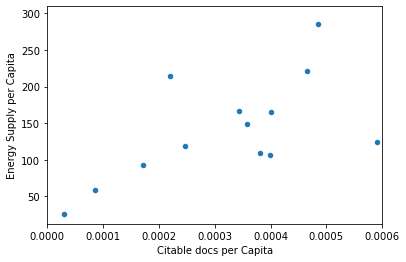

In [30]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = df_final.copy()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
    
plot9()

#### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median

In [31]:
median_renweable = df_final['% Renewable'].median()

def apply_onehot(row):
    if row['% Renewable'] >= median_renweable:
        row['HighRenew'] = int(1)
    else:
        row['HighRenew'] = (0)
    return row

df_final = df_final.apply(apply_onehot, axis=1)
df_final.sort_values('Rank', inplace=True)
df_final['HighRenew'] = df_final['HighRenew'].astype(int)
df_final.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2010,2011,2012,2013,2014,2015,cit_ratio,Population,cit_docs_per_person,HighRenew
Country,,,,,,,,,,,,,,,,,,,,,
China,1.0,235126.0,233883.0,1909601.0,1306438.0,8.12,224.0,1.271910e+11,93.0,19.75491,...,6.087165e+12,6.668544e+12,7.192667e+12,7.751438e+12,8.326945e+12,8.913317e+12,0.684142,1.367645e+09,0.000171,1
United States,2.0,157811.0,154288.0,1940563.0,639345.0,12.30,333.0,9.083800e+10,286.0,11.57098,...,1.499205e+13,1.522455e+13,1.556704e+13,1.585380e+13,1.624253e+13,1.671046e+13,0.329464,3.176154e+08,0.000486,0
Japan,3.0,46032.0,45559.0,436961.0,109968.0,9.49,181.0,1.898400e+10,149.0,10.23282,...,5.700098e+12,5.693519e+12,5.778642e+12,5.894231e+12,5.916317e+12,5.988669e+12,0.251665,1.274094e+08,0.000358,0
India,4.0,39893.0,38848.0,368175.0,123446.0,9.23,171.0,3.319500e+10,26.0,14.96908,...,1.675615e+12,1.763440e+12,1.859660e+12,1.978420e+12,2.125025e+12,2.294947e+12,0.335292,1.276731e+09,0.000030,0
United Kingdom,5.0,38873.0,37780.0,536378.0,100038.0,13.80,208.0,7.920000e+09,124.0,10.60047,...,2.475244e+12,2.513367e+12,2.550538e+12,2.605106e+12,2.673033e+12,2.735997e+12,0.186507,6.387097e+07,0.000592,0


#### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country
```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

In [34]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
df_final['Continent'] = df_final.index

def continent_mapper(count):
    return ContinentDict[count]

df_final['Continent'] = df_final['Continent'].apply(continent_mapper)
pivot_df = df_final.pivot_table(values='Population', index='Continent', aggfunc=[len, np.sum, np.mean, np.std])
pivot_df.columns = ['size', 'sum', 'mean', 'std']
pivot_df

,size,sum,mean,std
Asia,5.0,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


#### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

In [35]:
df_final.sort_values('Rank', inplace=True)
df_final.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2011,2012,2013,2014,2015,cit_ratio,Population,cit_docs_per_person,HighRenew,Continent
Country,,,,,,,,,,,,,,,,,,,,,
China,1.0,235126.0,233883.0,1909601.0,1306438.0,8.12,224.0,1.271910e+11,93.0,19.75491,...,6.668544e+12,7.192667e+12,7.751438e+12,8.326945e+12,8.913317e+12,0.684142,1.367645e+09,0.000171,1,Asia
United States,2.0,157811.0,154288.0,1940563.0,639345.0,12.30,333.0,9.083800e+10,286.0,11.57098,...,1.522455e+13,1.556704e+13,1.585380e+13,1.624253e+13,1.671046e+13,0.329464,3.176154e+08,0.000486,0,North America
Japan,3.0,46032.0,45559.0,436961.0,109968.0,9.49,181.0,1.898400e+10,149.0,10.23282,...,5.693519e+12,5.778642e+12,5.894231e+12,5.916317e+12,5.988669e+12,0.251665,1.274094e+08,0.000358,0,Asia
India,4.0,39893.0,38848.0,368175.0,123446.0,9.23,171.0,3.319500e+10,26.0,14.96908,...,1.763440e+12,1.859660e+12,1.978420e+12,2.125025e+12,2.294947e+12,0.335292,1.276731e+09,0.000030,0,Asia
United Kingdom,5.0,38873.0,37780.0,536378.0,100038.0,13.80,208.0,7.920000e+09,124.0,10.60047,...,2.513367e+12,2.550538e+12,2.605106e+12,2.673033e+12,2.735997e+12,0.186507,6.387097e+07,0.000592,0,Europe


In [36]:
df_final = df_final.reset_index()
labels =[1, 2, 3, 4, 5]
df_final['% Renewable'] = pd.cut(df_final['% Renewable'], bins=5, labels=labels)
df_final.set_index(['Continent', '% Renewable']).groupby(level=[0, 1]).count().dropna()['Country'].astype(int)

Continent      % Renewable
Asia           1              4
               2              1
Australia      1              1
Europe         1              1
               2              3
               3              2
North America  1              1
               5              1
South America  5              1
Name: Country, dtype: int32

#### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

In [37]:
df_final['Population'].apply('{:,}'.format)

0     1,367,645,161.2903225
1      317,615,384.61538464
2      127,409,395.97315437
3     1,276,730,769.2307692
4      63,870,967.741935484
5       80,369,696.96969697
6             143,500,000.0
7       35,239,864.86486486
8      59,908,256.880733944
9      49,805,429.864253394
10      63,837,349.39759036
11      77,075,630.25210084
12       46,443,396.2264151
13     23,316,017.316017315
14     205,915,254.23728815
Name: Population, dtype: object

In [40]:
df_final.set_index('Country', inplace=True)

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


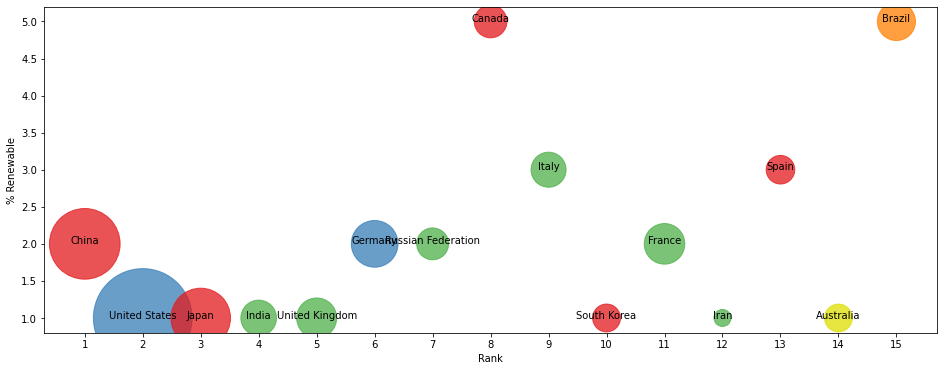

In [41]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = df_final.copy()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")
    
plot_optional()